<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Assignment2_TMD_CE784.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [275]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [276]:
df = pd.read_csv('/content/drive/MyDrive/1b80ce01455252fb312ac516e738750eeef007f14ef9c8f64e4431fe3f495dd9_cleaned/cleaned.csv')

In [277]:
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [278]:
print(len(df.user.unique())) #number of unique useers
print(df.user.unique()) # userID of unique users

32
['a2d80ed662f34d32951eb1c6ed076c313e358b73'
 'a526f3566e9c9024dfa7378eb4291d787a09fd37'
 'a59868c6eb3645eedbb343ce8c336ec6f2ef2324'
 'a92dee88f61123f923dccec01eeecf1a81953b36'
 'ac4c17afeb69b39169eb301ab592696a8f353976'
 'adaaae1a67ea9e43abd60ba945eccda0cb8821e0'
 'b138d165100ef60bc793cac143742eb5aea4d6ba'
 'b45157069942d01310c3e7b74034166717bb25f9'
 'b7b165e5637b5a0226068d907748f4bbfc61a320'
 'c453226e3616ae821cdcb38f38481c2a20f2482f'
 'c5702d34b238fe68683f818e82cd3a3cd8a16366'
 'ca7950f223a8037b897d0547075dc138f9e43b20'
 'cace4ec0999436917986b4fa6e9317262c897bc2'
 'cbde60baea002b694ecf2a3ff2d95be16b00efe1'
 'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c'
 'd429974540bfd38c3367fe9f0c8682775ff4fa18'
 'd7a1230d94f91a32cc079809748e52e8a4a6a22f'
 'd7dd12d83c81574137f858034b99f4cc83ab0718'
 'd8c047eaaee204b7b5cd71e2d67308b87b038ed3'
 'dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120'
 'dd82e3df4bebc74ed6b67877be79e29f401c16a3'
 'dde95e125d89843f7032baa734ee4d34ec775aaf'
 'de9892b879c83ea3d24fb456087

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB


In [280]:
len(df['user'])


5653053

In [281]:

# user_c=[]
# for i in range(len(df['user'])-1):
#   if (df['user'][i] != df['user'][i+1]):
#     user_c.append(1)
#   else:
#     user_c.append(0)
# user_c.append(1)
# df['user_c'] = user_c

In [282]:
# sum(df['user_c'])

In [283]:
# class_c=[]
# for i in range(len(df['user'])-1):
#   if (df['class'][i] != df['class'][i+1]):
#     class_c.append(1)
#   else:
#     class_c.append(0)
# class_c.append(1)
# df['class_c'] = class_c

In [284]:
# df.head()

In [285]:
# sum(df['class_c'])

In [286]:
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [287]:
#Added a new column 'seq_c to dataframe df whose value is 1 when user or mode changes otherwise value is zero.
seq_c = []
for i  in range(len(df['user'])-1):
  if (df['class'][i] != df['class'][i+1] or df['user'][i] != df['user'][i+1]):
    seq_c.append(1)
  else :
    seq_c.append(0)
seq_c.append(1)
df['seq_c'] = seq_c

In [288]:
sum(df['seq_c']) # counted no. of sequence change only due to changes in only user and mode

138

In [289]:
# df.head()

In [290]:
df['time_s'] = df['timestamp'].shift(1, axis=0) # created a new column 'time_s' by shifting 'timestamp' column by one

In [291]:
df.head() 

,user,timestamp,x,y,z,class,seq_c,time_s
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,0,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,0,2018-06-04 16:26:55.053
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,0,2018-06-04 16:26:55.111
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,0,2018-06-04 16:26:55.169
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,0,2018-06-04 16:26:55.228


In [292]:
# converted 'timestamp' and 'time_s' columns into datatime64[s]
df['timestamp'] = df['timestamp'].astype('datetime64[s]')
df['time_s'] = df['time_s'].astype('datetime64[s]')


In [293]:
#created a new columns 'time_d' by taking difference of 'timestam' and 'time_s'
df['time_d'] = (df['timestamp'] - df['time_s'])/np.timedelta64(1, 's')

In [294]:
# df['time_d']

In [295]:
#find unique user and unique mode and assign it to rows and col respectively
rows = df['user'].unique()
col = df['class'].unique()

In [296]:
#find unique no. of user and unique no. of mode and assign it to rows_len and col_len respectively
rows_len = len(df['user'].unique())
col_len = len(df['class'].unique())

In [297]:
#created a 2d array of size (rows_len, col_len) with all elements 0.
num_seq = np.zeros((rows_len, col_len))

In [298]:
#created a dataframe df_num_seg  with index=rows and column = col which will contain sequences corresponding to each users
df_num_seq = pd.DataFrame(num_seq, index = rows,columns=col)

In [299]:
df['sequence'] = np.zeros(df.shape[0],int)

In [300]:
df['sequence'][0] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [301]:
#here values in dataframe df_num_seq are updated, if df['seq_c'] is equal to one (user or mode changes) or time difference is greater than 10 sec. 
#we will increment mode corrosponding to that user
for i in range(len(df['seq_c'])):
  if df['seq_c'][i] == 1 or df['time_d'][i] > 10:

    df_num_seq.loc[df['user'][i], df['class'][i]] +=1
    df['sequence'][i] = 1
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [302]:
# Answer of Question no. 2
df_num_seq

,bus,walk,car,bike,train,e-bike
a2d80ed662f34d32951eb1c6ed076c313e358b73,12.0,0.0,0.0,0.0,0.0,0.0
a526f3566e9c9024dfa7378eb4291d787a09fd37,0.0,22.0,17.0,0.0,0.0,0.0
a59868c6eb3645eedbb343ce8c336ec6f2ef2324,20.0,13.0,69.0,40.0,0.0,0.0
a92dee88f61123f923dccec01eeecf1a81953b36,3.0,0.0,0.0,0.0,0.0,0.0
ac4c17afeb69b39169eb301ab592696a8f353976,0.0,58.0,21.0,0.0,0.0,0.0
adaaae1a67ea9e43abd60ba945eccda0cb8821e0,24.0,11.0,20.0,0.0,0.0,0.0
b138d165100ef60bc793cac143742eb5aea4d6ba,0.0,0.0,10.0,0.0,0.0,0.0
b45157069942d01310c3e7b74034166717bb25f9,0.0,4.0,5.0,0.0,0.0,0.0
b7b165e5637b5a0226068d907748f4bbfc61a320,0.0,13.0,194.0,0.0,0.0,0.0
c453226e3616ae821cdcb38f38481c2a20f2482f,287.0,0.0,0.0,170.0,0.0,0.0


In [303]:
#Found total no. of sequences
sum(df_num_seq['bus'])+sum(df_num_seq['walk'])+sum(df_num_seq['car'])+sum(df_num_seq['bike'])+sum(df_num_seq['train'])+sum(df_num_seq['e-bike'])

3494.0

In [304]:
#find the cumulative some of sequence column of dataframe df
df['sequence'] = df['sequence'].cumsum()

In [305]:
sum(df['sequence'])

8203907963

In [306]:

#df

##Q.3

In [307]:
# df1 = df_num_seq.cumsum(axis = 0, skipna = True)

In [308]:
df.head()

,user,timestamp,x,y,z,class,seq_c,time_s,time_d,sequence
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,0,NaT,NaN,1
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,0,2018-06-04 16:26:55,0.0,1
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,0,2018-06-04 16:26:55,0.0,1
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,0,2018-06-04 16:26:55,0.0,1
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,0,2018-06-04 16:26:55,0.0,1


In [309]:
#dropped seq_c column from df
df = df.drop(['seq_c'],axis = 1)

In [310]:
df['min_t'] = df.groupby('sequence').timestamp.transform('min')

In [311]:
df.head()

,user,timestamp,x,y,z,class,time_s,time_d,sequence,min_t
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,NaT,NaN,1,2018-06-04 16:26:55
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55


In [312]:
def CreatePartition(seq_id, t, minT):
  r = (t-minT)/np.timedelta64(1,'s')
  r_int = int(r/5)
  r_str = str(r_int)
  ans = str(seq_id) + "->" + r_str
  return ans

In [313]:
df['part_idx'] = np.vectorize(CreatePartition)(df['sequence'], df['timestamp'],df['min_t'])

In [314]:
df['part_idx'].nunique()

40593

In [315]:
df.head()

,user,timestamp,x,y,z,class,time_s,time_d,sequence,min_t,part_idx
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,NaT,NaN,1,2018-06-04 16:26:55,1->0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0


In [316]:
df4 = df.drop(['timestamp','x','y','z','time_s','time_d','sequence','min_t'], axis = 1)

In [317]:
df3 = df4.groupby(['user','class']).nunique()

In [318]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)
df3

part_idx
user                                     class           
a2d80ed662f34d32951eb1c6ed076c313e358b73 bus           35
a526f3566e9c9024dfa7378eb4291d787a09fd37 car         1546
                                         walk         302
a59868c6eb3645eedbb343ce8c336ec6f2ef2324 bike         572
                                         bus         3854
                                         car         2090
                                         walk         827
a92dee88f61123f923dccec01eeecf1a81953b36 bus          730
ac4c17afeb69b39169eb301ab592696a8f353976 car           63
                                         walk         480
adaaae1a67ea9e43abd60ba945eccda0cb8821e0 bus         1160
                                         car          537
                                         walk         155
b138d165100ef60bc793cac143742eb5aea4d6ba car          416
b45157069942d01310c3e7b74034166717bb25f9 car          430
                                         walk          76
b7b165e5637b5a0226068d907748f4bbfc61a320 car         2135
                                         walk         206
c453226e3616ae821cdcb38f38481c2a20f2482f bike         502
                                         bus         1469
c5702d34b238fe68683f818e82cd3a3cd8a16366 bike         204
                                         bus          200
                                         walk        1243
ca7950f223a8037b897d0547075dc138f9e43b20 walk          65
cace4ec0999436917986b4fa6e9317262c897bc2 car         1151
cbde60baea002b694ecf2a3ff2d95be16b00efe1 bus          414
ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c bus          448
                                         car          506
d429974540bfd38c3367fe9f0c8682775ff4fa18 bus          521
                                         car          921
                                         walk         102
d7a1230d94f91a32cc079809748e52e8a4a6a22f bike         369
                                         train        420
                                         walk          81
d7dd12d83c81574137f858034b99f4cc83ab0718 car          674
d8c047eaaee204b7b5cd71e2d67308b87b038ed3 car         1762
                                         walk         165
dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120 bike         574
                                         car          148
                                         walk          37
dd82e3df4bebc74ed6b67877be79e29f401c16a3 car          940
                                         walk         237
dde95e125d89843f7032baa734ee4d34ec775aaf bus           35
                                         car           43
                                         walk          51
de9892b879c83ea3d24fb4560873107cc4e86d48 car          925
                                         walk         337
dfcfc0404691b73b69884073159f90843f2ac35b bus          441
                                         car         1271
                                         walk         797
e429a95c532f1117130c11e4a18379d84fa4ffa9 bus          620
                                         car          185
eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076 bus          359
                                         train        159
                                         walk         198
ecfb0929250fb6dda66a4065441230ab27f094e5 car         1029
                                         e-bike        81
                                         train         22
ed623d28c1e0071632a6110b8f8ed93f8af78b99 bus           72
                                         car         2175
                                         walk          17
f1b7331b66e404c11eebb22933e733117bbb12c9 bike         397
                                         car          779
                                         walk         199
f5edd999397145a2ec1b244226fc83f99631760c bus          303
                                         walk         120
f7ae1ce141c26db40ea8b090fb568a0c965310aa car          290
faae5be800be2dfa897eea0bd2e5988cd53c4ec0 bike  

In [319]:
df4.head()

,user,class,part_idx
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1->0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1->0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1->0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1->0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,bus,1->0


In [320]:
df.head()

,user,timestamp,x,y,z,class,time_s,time_d,sequence,min_t,part_idx
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.13,-3.74,bus,NaT,NaN,1,2018-06-04 16:26:55,1->0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.79,-9.11,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.80,-9.12,-3.75,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.78,-9.14,-3.76,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55,0.83,-9.12,-3.80,bus,2018-06-04 16:26:55,0.0,1,2018-06-04 16:26:55,1->0


In [321]:
df5 = pd.DataFrame(columns = ['x_mean', 'x_std', 'x_max', 'y_min', 'x_mean', 'x_std', 'x_max', 'y_min', 'x_mean', 'x_std', 'x_max', 'y_min'])

In [322]:
df5['x_mean'] = df.groupby(['part_idx'])['x'].mean()
df5['x_std'] = df.groupby(['part_idx'])['x'].std()
df5['x_max'] = df.groupby(['part_idx'])['x'].max()
df5['x_min'] = df.groupby(['part_idx'])['x'].min()

df5['y_mean'] = df.groupby(['part_idx'])['y'].mean()
df5['y_std'] = df.groupby(['part_idx'])['y'].std()
df5['y_max'] = df.groupby(['part_idx'])['y'].max()
df5['y_min'] = df.groupby(['part_idx'])['y'].min()

df5['z_mean'] = df.groupby(['part_idx'])['z'].mean()
df5['z_std'] = df.groupby(['part_idx'])['z'].std()
df5['z_max'] = df.groupby(['part_idx'])['z'].max()
df5['z_min'] = df.groupby(['part_idx'])['z'].min()

df5['target'] =  df.groupby(['part_idx'])['class'].unique()

In [323]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,[bus]
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,[bus]
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,[bus]
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,[bus]
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,[car]


In [324]:
def func(x):
  return x[0]

In [325]:
df5['target'] = list(map(func,df5['target']))

In [326]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


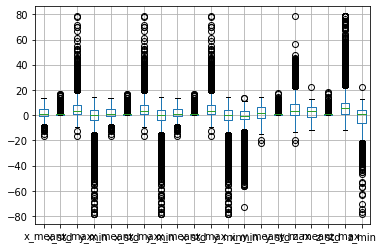

In [327]:
boxplot = df5.boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


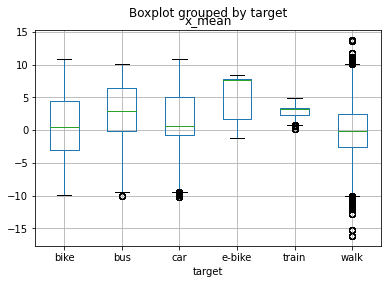

In [328]:
df5.boxplot(column = ['x_mean'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


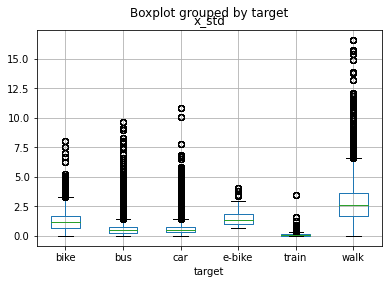

In [329]:
df5.boxplot(column = ['x_std'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


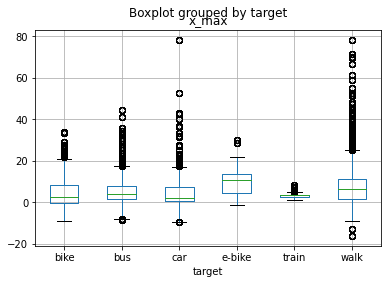

In [330]:
df5.boxplot(column = ['x_max'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


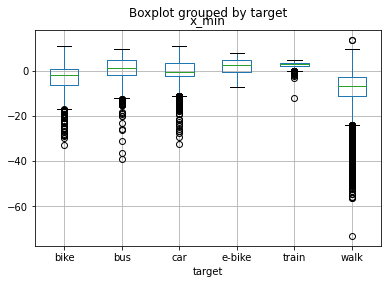

In [331]:
df5.boxplot(column = ['x_min'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


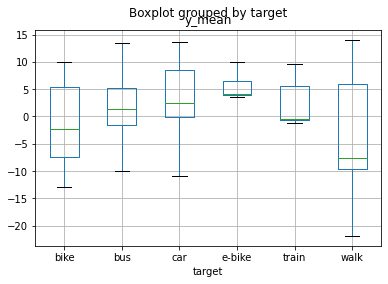

In [332]:
df5.boxplot(column = ['y_mean'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


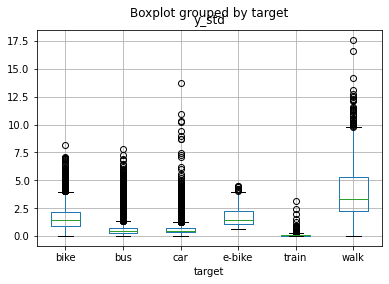

In [333]:
df5.boxplot(column = ['y_std'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


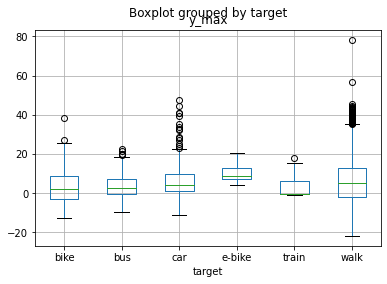

In [334]:
df5.boxplot(column = ['y_max'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


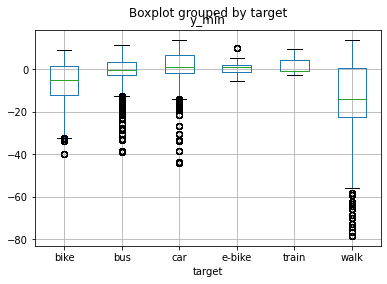

In [335]:
df5.boxplot(column = ['y_min'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


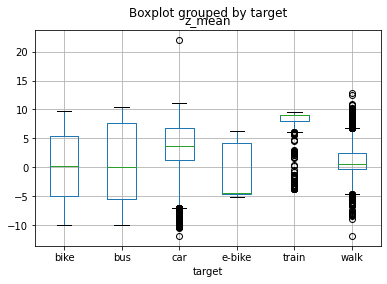

In [336]:
df5.boxplot(column = ['z_mean'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


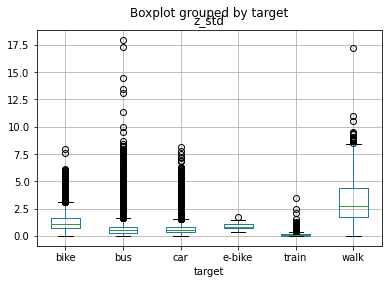

In [337]:
df5.boxplot(column = ['z_std'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


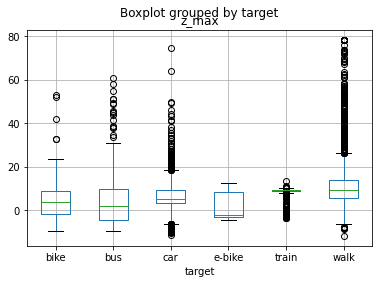

In [338]:
df5.boxplot(column = ['z_max'], by = 'target')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


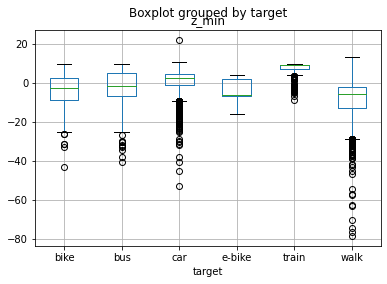

In [339]:
df5.boxplot(column = ['z_min'], by = 'target')

Class=1, n=10661 (26.263%)
Class=2, n=20242 (49.866%)
Class=5, n=5847 (14.404%)
Class=0, n=3161 (7.787%)
Class=4, n=601 (1.481%)
Class=3, n=81 (0.200%)


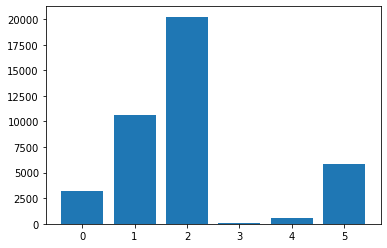

In [340]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
data = df5.values
X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [341]:
# data = df5.values
# X, y = data[:, :-1], data[:, -1]
# y = LabelEncoder().fit_transform(y)
# undersample = SMOTE()
# X, y = undersample.fit_resample(X, y)
# counter = Counter(y)
# for k,v in counter.items():
# 	per = v / len(y) * 100
# 	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [342]:
print(X)

[[0.8001408425854964 0.022135491967534483 0.8500000238418579 ...
  0.028708596946844855 -3.670000076293945 -3.809999942779541]
 [0.8099999984105428 0.01690307904956004 0.8299999833106995 ...
  0.02120195632779195 -3.700000047683716 -3.7799999713897705]
 [1.8504964527508891 0.5861500674686537 3.430000066757202 ...
  0.6460080789854357 -3.440000057220459 -6.400000095367432]
 ...
 [8.20833330684238 0.40935480963454557 9.5600004196167 ...
  0.5265630809384949 -3.190000057220459 -5.860000133514404]
 [8.051666577657064 0.2598472171780208 8.470000267028809 ...
  0.35185640569669885 -4.039999961853027 -5.389999866485596]
 [8.496555548244052 0.3263858447779168 9.4399995803833 ...
  0.6381178998676386 -2.5899999141693115 -5.599999904632568]]


In [343]:
print(y)

[1 1 1 ... 1 1 1]


In [344]:
type(X)

numpy.ndarray

In [345]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
part_idx,,,,,,,,,,,,,,,,,,,,,
1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [346]:
df5 = df5.reset_index()

In [347]:
df5.head()

,part_idx,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
0,1->0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1,1->1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
2,10->0,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
3,10->1,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
4,100->0,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [348]:
df5 = df5.drop(['part_idx'],axis = 1)

In [349]:
df5.head()

,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_mean,x_std,x_max,y_min,x_min,y_mean,y_std,y_max,z_mean,z_std,z_max,z_min,target
0,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.800141,0.022135,0.85,-9.18,0.75,-9.127324,0.018513,-9.08,-3.747606,0.028709,-3.67,-3.81,bus
1,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.810000,0.016903,0.83,-9.14,0.77,-9.118000,0.016125,-9.09,-3.747333,0.021202,-3.70,-3.78,bus
2,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,1.850496,0.586150,3.43,-9.38,0.37,-8.079362,0.534036,-7.10,-5.522057,0.646008,-3.44,-6.40,bus
3,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,2.299412,0.168355,2.52,-7.75,1.97,-7.336471,0.243258,-6.87,-6.140000,0.296036,-5.72,-6.64,bus
4,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.250972,0.098798,0.43,8.62,0.03,8.907778,0.122051,9.23,4.246111,0.145550,4.55,3.73,car


In [350]:
df5 = df5.dropna()

In [351]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40413 entries, 0 to 40592
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_mean  40413 non-null  float64
 1   x_std   40413 non-null  float64
 2   x_max   40413 non-null  float64
 3   y_min   40413 non-null  float64
 4   x_mean  40413 non-null  float64
 5   x_std   40413 non-null  float64
 6   x_max   40413 non-null  float64
 7   y_min   40413 non-null  float64
 8   x_mean  40413 non-null  float64
 9   x_std   40413 non-null  float64
 10  x_max   40413 non-null  float64
 11  y_min   40413 non-null  float64
 12  x_min   40413 non-null  float64
 13  y_mean  40413 non-null  float64
 14  y_std   40413 non-null  float64
 15  y_max   40413 non-null  float64
 16  z_mean  40413 non-null  float64
 17  z_std   40413 non-null  float64
 18  z_max   40413 non-null  float64
 19  z_min   40413 non-null  float64
 20  target  40413 non-null  object 
dtypes: float64(20), object(1)
memory us

Class=0, n=79 (16.667%)
Class=1, n=79 (16.667%)
Class=2, n=79 (16.667%)
Class=3, n=79 (16.667%)
Class=4, n=79 (16.667%)
Class=5, n=79 (16.667%)


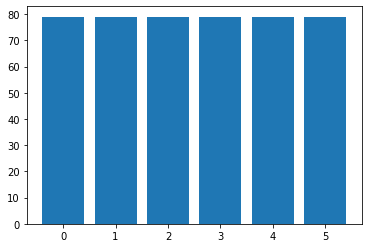

In [352]:
from imblearn.under_sampling import NearMiss
data = df5.values
X, y = data[:, :-1], data[:, -1]
y = LabelEncoder().fit_transform(y)
undersample = NearMiss()
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [353]:
len(y)

474

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [355]:
from sklearn.svm import SVC  
model_svm = SVC(kernel='linear') 

model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [356]:
model_svm.score(X_valid, y_valid)

0.7872340425531915

In [357]:
y_pred=model_svm.predict(X_test)

In [358]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.8426262626262626

In [359]:
from sklearn.linear_model import LogisticRegression
model_logi = LogisticRegression()
model_logi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [360]:
y_pred_logi = model_logi.predict(X_test)

In [361]:
f1_score(y_test, y_pred_logi, average='macro')

0.8838961038961037

In [362]:
#imported necessary packages for model
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [363]:
input_shape = [X_train.shape[1]]
#sequential MLP model 
model = tf.keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(12, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(9, activation='relu'),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.Dense(6, activation = 'sigmoid'),
])

In [364]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [365]:
y1_train  = tf.keras.utils.to_categorical(y_train)
y1_test = tf.keras.utils.to_categorical(y_test)
y1_valid = tf.keras.utils.to_categorical(y_valid)

In [366]:
y1_train.shape

(379, 6)

In [367]:
y1_test.shape

(48, 6)

Epoch 1/200
24/24 [==============================] - 1s 13ms/step - loss: 1.8351 - accuracy: 0.2401 - val_loss: 1.8481 - val_accuracy: 0.2292
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 1.5200 - accuracy: 0.3879 - val_loss: 1.6711 - val_accuracy: 0.2292
Epoch 3/200
24/24 [==============================] - 0s 5ms/step - loss: 1.3655 - accuracy: 0.4697 - val_loss: 1.5661 - val_accuracy: 0.2500
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 1.2484 - accuracy: 0.5119 - val_loss: 1.4757 - val_accuracy: 0.3958
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 1.1553 - accuracy: 0.5594 - val_loss: 1.3547 - val_accuracy: 0.5208
Epoch 6/200
24/24 [==============================] - 0s 6ms/step - loss: 1.0983 - accuracy: 0.5805 - val_loss: 1.2494 - val_accuracy: 0.6042
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 1.0991 - accuracy: 0.5884 - val_loss: 1.1802 - val_accuracy: 0.6458
Epoch 8/200


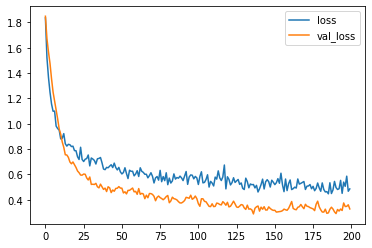

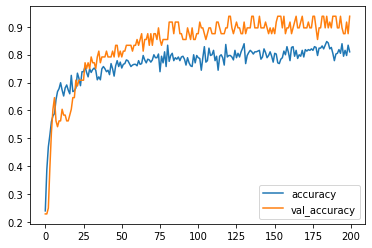

In [368]:
#training model
epochs = 200
history = model.fit(X_train, y1_train, batch_size=16,
                    epochs=epochs, verbose=1,
                    validation_data=(X_test, y1_test)
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [369]:
y_pred_ann = model.predict(X_test)